In [2]:
import datetime as dt
import matplotlib .pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [4]:
style.use('ggplot')
x = dt.datetime.now()
start=dt.datetime(2000,1,1)
end=dt.datetime(x.year,x.month,x.day)


In [5]:
df=web.DataReader('SBIN.NS','yahoo',start,end)
print(df.tail())
df.to_csv('sbi.csv')

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-05-05  357.450012  348.000000  356.500000  355.399994  40872501.0   
2021-05-06  359.350006  350.549988  358.000000  355.549988  36294427.0   
2021-05-07  362.000000  353.000000  357.500000  358.250000  38357618.0   
2021-05-10  367.000000  358.799988  360.500000  361.700012  41739324.0   
2021-05-11  366.399994  354.750000  356.850006  364.649994  41883154.0   

             Adj Close  
Date                    
2021-05-05  355.399994  
2021-05-06  355.549988  
2021-05-07  358.250000  
2021-05-10  361.700012  
2021-05-11  364.649994  


In [6]:
df=pd.read_csv('sbi.csv',parse_dates=True,index_col=0)
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2000-01-03  22.988886  22.101974  22.267092  22.988886  25152894.0  16.833885
2000-01-04  24.720245  22.535995  22.988886  24.446625  47648560.0  17.901331
2000-01-05  24.974997  23.116261  23.493668  23.441774  36396207.0  17.165516
2000-01-06  25.286358  23.776726  23.776726  24.625893  70573968.0  18.032602
2000-01-07  26.409147  24.059780  24.673071  25.786425  83453217.0  18.882420


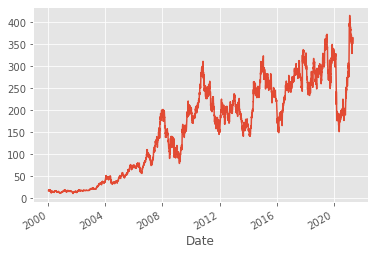

In [7]:
df['Adj Close'].plot()
plt.show()

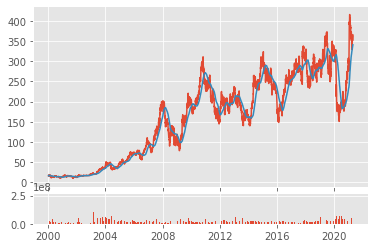

In [9]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
# df.dropna(inplace=True)
# print(df.head())

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()